In [ ]:
## WeatherPy

### Analysis:
    1. Temperature decreases as latitude increases from the equator (latitude > 0)
    2. Most cities below the equator (latitudes < 0) have temperatures between 60 and 100 degrees F, 
    indicating summer in the southern hemisphere
    3. Highest wind speeds (>25mph) are currently only in the northern hemisphere with latitudes greater than 10
    

In [11]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
import random
import requests as req
import json
import time

In [12]:
apikey="a0f4ad483dfe2b70590d60e151064065"
url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = url + "appid=" + apikey + "&units=" + units + "&q="

In [13]:
#Create Random List of Lat and Long Coordinates
latrange=list(np.arange(-90,90,0.01))   
longrange=list(np.arange(-180,180,0.01))
lat=random.sample(latrange,3000)
long=random.sample(longrange,3000)

In [14]:
cities=pd.DataFrame({"Latitude":lat,"Longitude":long})
cities["City"]=""
cities["Country"]=""

In [15]:
for index in range(len(cities.index)):
    lati=cities.at[index,"Latitude"]
    longi=cities.at[index,"Longitude"]
    city=citipy.nearest_city(lati,longi)
    cities.at[index,"City"]=city.city_name
    cities.at[index,"Country"]=city.country_code
cities.head()

,Latitude,Longitude,City,Country
0,-56.04,-11.27,cape town,za
1,-87.53,57.74,port alfred,za
2,-54.20,102.98,busselton,au
3,-42.83,-179.24,vaini,to
4,76.33,-0.38,barentsburg,sj


In [18]:
#Create columns for weather data, drop duplicate cities, reset index
cities["Temperature"]=""
cities["Cloudiness"]=""
cities["Humidity"]=""
cities["Wind Speed"]=""
cities["Updated Latitude"]=""
cities=cities.drop_duplicates(subset=["City"],keep=False)
cities=cities.reset_index(drop=True)
numcities=len(cities.index)

In [19]:
for row in range(numcities):
    url=query_url+cities.at[row,"City"]+","+cities.at[row,"Country"]
    print("Processing Request {} out of {} | {}".format(row+1,numcities,cities.at[row,"City"]))
    print(url)
    try:
        weather=req.get(url).json()
        cities.at[row,"Humidity"]=weather["main"]["humidity"]
        cities.at[row,"Temperature"]=weather["main"]["temp"]
        cities.at[row,"Cloudiness"]=weather["clouds"]["all"]
        cities.at[row,"Wind Speed"]=weather["wind"]["speed"]
        cities.at[row,"Updated Latitude"]=weather["coord"]["lat"]
        time.sleep(1) #wait for 1 second
    except KeyError:
        cities.at[row,"Humidity"]=np.nan
        cities.at[row,"Temperature"]=np.nan
        cities.at[row,"Cloudiness"]=np.nan
        cities.at[row,"Wind Speed"]=np.nan
        cities.at[row,"Updated Latitude"]=np.nan
        time.sleep(1) #wait for 1 second
        
cities.head(10)

Processing Request 1 out of 685 | carutapera
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=carutapera,br
Processing Request 2 out of 685 | ondjiva
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=ondjiva,ao
Processing Request 3 out of 685 | acajutla
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=acajutla,sv
Processing Request 4 out of 685 | oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=oktyabrskoye,ru
Processing Request 5 out of 685 | samdari
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=samdari,in
Processing Request 6 out of 685 | otane
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=otane,nz
Processing Request 7 out of 685 | anapskaya
http:/

Processing Request 53 out of 685 | gorno-chuyskiy
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=gorno-chuyskiy,ru
Processing Request 54 out of 685 | nioro
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=nioro,ml
Processing Request 55 out of 685 | koungou
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=koungou,yt
Processing Request 56 out of 685 | champerico
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=champerico,gt
Processing Request 57 out of 685 | alekseyevsk
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=alekseyevsk,ru
Processing Request 58 out of 685 | segezha
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=segezha,ru
Processing Request 59 out of 685 |

Processing Request 105 out of 685 | saravan
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=saravan,la
Processing Request 106 out of 685 | bereda
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=bereda,so
Processing Request 107 out of 685 | yangjiang
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=yangjiang,cn
Processing Request 108 out of 685 | keti bandar
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=keti bandar,pk
Processing Request 109 out of 685 | wuxue
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=wuxue,cn
Processing Request 110 out of 685 | chase
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=chase,ca
Processing Request 111 out of 685 | smithfield
htt

Processing Request 156 out of 685 | idah
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=idah,ng
Processing Request 157 out of 685 | kadoma
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=kadoma,zw
Processing Request 158 out of 685 | saint-ambroise
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=saint-ambroise,ca
Processing Request 159 out of 685 | mokhsogollokh
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=mokhsogollokh,ru
Processing Request 160 out of 685 | foz
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=foz,es
Processing Request 161 out of 685 | rabo de peixe
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=rabo de peixe,pt
Processing Request 162 out of 

Processing Request 208 out of 685 | olinda
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=olinda,br
Processing Request 209 out of 685 | lappeenranta
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=lappeenranta,fi
Processing Request 210 out of 685 | sitio novo do tocantins
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=sitio novo do tocantins,br
Processing Request 211 out of 685 | goderich
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=goderich,sl
Processing Request 212 out of 685 | desbiens
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=desbiens,ca
Processing Request 213 out of 685 | wanganui
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=wanganui,nz
Proces

Processing Request 260 out of 685 | mezen
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=mezen,ru
Processing Request 261 out of 685 | babanusah
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=babanusah,sd
Processing Request 262 out of 685 | tarudant
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=tarudant,ma
Processing Request 263 out of 685 | kyra
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=kyra,ru
Processing Request 264 out of 685 | katangli
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=katangli,ru
Processing Request 265 out of 685 | coahuayana
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=coahuayana,mx
Processing Request 266 out of 685 | redlands
htt

Processing Request 312 out of 685 | massakory
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=massakory,td
Processing Request 313 out of 685 | ascension
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=ascension,bo
Processing Request 314 out of 685 | tadine
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=tadine,nc
Processing Request 315 out of 685 | guarapari
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=guarapari,br
Processing Request 316 out of 685 | baracoa
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=baracoa,cu
Processing Request 317 out of 685 | robertsport
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=robertsport,lr
Processing Request 318 out of 685 

Processing Request 363 out of 685 | muzhi
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=muzhi,ru
Processing Request 364 out of 685 | jumla
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=jumla,np
Processing Request 365 out of 685 | taft
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=taft,ir
Processing Request 366 out of 685 | partenit
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=partenit,ua
Processing Request 367 out of 685 | cagayan de tawi-tawi
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=cagayan de tawi-tawi,ph
Processing Request 368 out of 685 | carmen
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=carmen,mx
Processing Request 369 out of 685 | char

Processing Request 415 out of 685 | nan
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=nan,th
Processing Request 416 out of 685 | kuche
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=kuche,cn
Processing Request 417 out of 685 | kushima
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=kushima,jp
Processing Request 418 out of 685 | labis
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=labis,my
Processing Request 419 out of 685 | puerto rico
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=puerto rico,co
Processing Request 420 out of 685 | cururupu
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=cururupu,br
Processing Request 421 out of 685 | bezhetsk
http://api.op

Processing Request 466 out of 685 | mont-dore
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=mont-dore,nc
Processing Request 467 out of 685 | padang
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=padang,id
Processing Request 468 out of 685 | nyimba
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=nyimba,zm
Processing Request 469 out of 685 | launceston
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=launceston,au
Processing Request 470 out of 685 | yuzhno-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=yuzhno-yeniseyskiy,ru
Processing Request 471 out of 685 | nuuk
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=nuuk,gl
Processing Request 472 out of 

Processing Request 518 out of 685 | puro
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=puro,ph
Processing Request 519 out of 685 | yingkou
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=yingkou,cn
Processing Request 520 out of 685 | viedma
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=viedma,ar
Processing Request 521 out of 685 | sontra
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=sontra,de
Processing Request 522 out of 685 | tilsonburg
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=tilsonburg,ca
Processing Request 523 out of 685 | orange cove
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=orange cove,us
Processing Request 524 out of 685 | usakos
http:

Processing Request 569 out of 685 | bay roberts
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=bay roberts,ca
Processing Request 570 out of 685 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=quatre cocos,mu
Processing Request 571 out of 685 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=sao joao da barra,br
Processing Request 572 out of 685 | ust-ilimsk
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=ust-ilimsk,ru
Processing Request 573 out of 685 | santo antonio do taua
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=santo antonio do taua,br
Processing Request 574 out of 685 | mogapi
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imp

Processing Request 620 out of 685 | suba
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=suba,ph
Processing Request 621 out of 685 | dubenskiy
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=dubenskiy,ru
Processing Request 622 out of 685 | ilabaya
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=ilabaya,pe
Processing Request 623 out of 685 | caluquembe
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=caluquembe,ao
Processing Request 624 out of 685 | slonim
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=slonim,by
Processing Request 625 out of 685 | elat
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=elat,il
Processing Request 626 out of 685 | perth
http://api.ope

Processing Request 672 out of 685 | panzhihua
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=panzhihua,cn
Processing Request 673 out of 685 | montgomery
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=montgomery,us
Processing Request 674 out of 685 | mouila
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=mouila,ga
Processing Request 675 out of 685 | archidona
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=archidona,ec
Processing Request 676 out of 685 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=rio gallegos,ar
Processing Request 677 out of 685 | nehe
http://api.openweathermap.org/data/2.5/weather?appid=a0f4ad483dfe2b70590d60e151064065&units=imperial&q=nehe,cn
Processing Request 678 out of 685 | 

,Latitude,Longitude,City,Country,Temperature,Cloudiness,Humidity,Wind Speed,Updated Latitude
0,7.15,-41.01,carutapera,br,80.7,64,86,6.33,-1.2
1,-16.08,16.01,ondjiva,ao,78.49,48,19,14.16,-17.07
2,13.22,-89.95,acajutla,sv,88.54,20,59,6.93,13.59
3,45.65,42.81,oktyabrskoye,ru,-1.21,56,79,4.88,56.73
4,25.78,72.69,samdari,in,66.66,0,56,4.09,25.81
5,-41.35,178.23,otane,nz,62.47,92,84,4.88,-39.89
6,44.63,37.04,anapskaya,ru,26.6,76,100,6.71,44.9
7,66.60,64.53,yeletskiy,ru,NaN,NaN,NaN,NaN,NaN
8,24.56,78.78,mahroni,in,66.57,0,60,2.75,24.59
9,13.88,-1.08,djibo,bf,85.33,0,24,10.47,14.1


In [20]:
#Drop rows without weather data
cities_filt=cities.dropna(axis=0,how="any")
cities_filt=cities_filt.reset_index()
cities_filt.index

RangeIndex(start=0, stop=599, step=1)

In [21]:
cities_filt.to_csv("RandomCityWeatherData.csv")

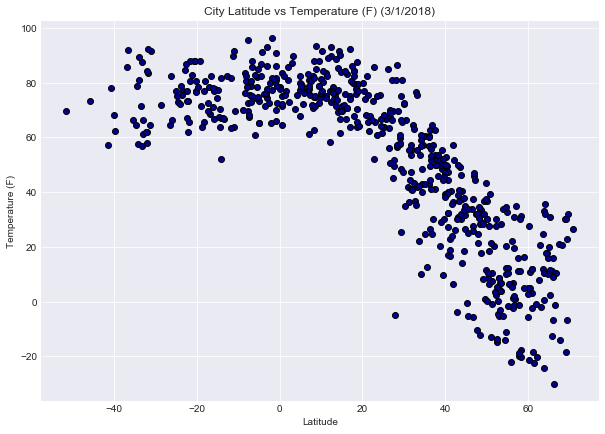

In [22]:
fig1=plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
templat=plt.scatter(cities_filt["Updated Latitude"],cities_filt["Temperature"],color="darkblue",marker='o',edgecolor="black")
plt.title("City Latitude vs Temperature (F) (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("LatitudevsTemp.png")
plt.show()

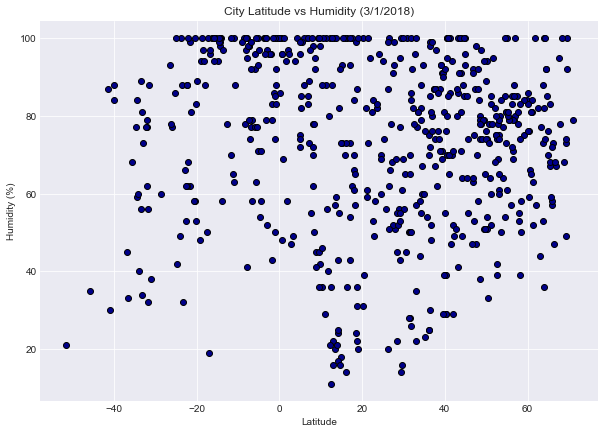

In [23]:
fig2=plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
templat=plt.scatter(cities_filt["Updated Latitude"],cities_filt["Humidity"],color="darkblue",marker='o',edgecolor="black")
plt.title("City Latitude vs Humidity (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("LatitudevsHumidity.png")
plt.show()

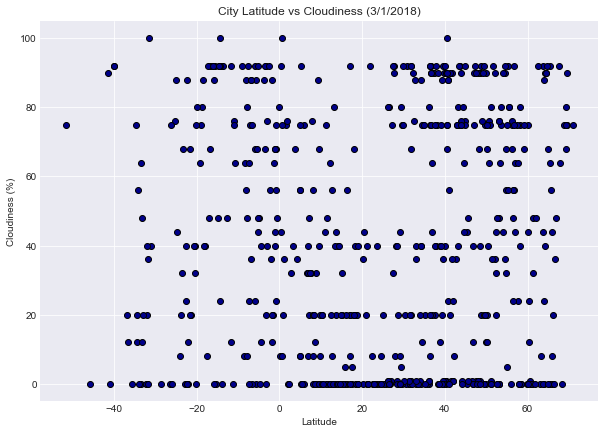

In [24]:
fig3=plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
templat=plt.scatter(cities_filt["Updated Latitude"],cities_filt["Cloudiness"],color="darkblue",marker='o',edgecolor="black")
plt.title("City Latitude vs Cloudiness (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("LatitudevsCloudiness.png")
plt.show()

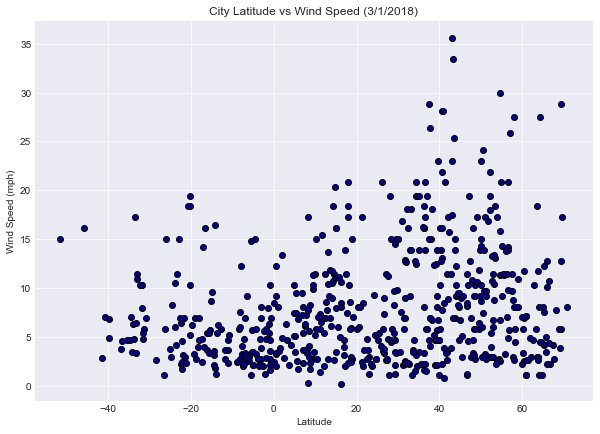

In [25]:
fig4=plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
templat=plt.scatter(cities_filt["Updated Latitude"],cities_filt["Wind Speed"],color="darkblue",marker='o',edgecolor="black")
plt.title("City Latitude vs Wind Speed (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("LatitudevsWindSpeed.png")
plt.show()